In [195]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [196]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [197]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [198]:
#def compute_loss(y, tx, w): #Using MSE
    #error_vector = y - np.matmul(tx, w) 
    #error_vector_processed = error_vector * error_vector 
    #summation_result = np.sum(error_vector_processed)
    #loss = summation_result / (2 * y.size) 
    #return loss

def compute_loss(y, tx, w): #Using MAE
    error_vector = y - np.matmul(tx, w) 
    error_vector_processed = np.absolute(error_vector)
    summation_result = np.sum(error_vector_processed)
    loss = summation_result / y.size
    return loss

# 2 Grid Search

Fill in the function `grid_search()` below:

In [199]:
def grid_search(y, tx, w0, w1):
    losses = np.zeros((len(w0), len(w1)))
    for index_w0, w0_candidate in enumerate(w0):
        for index_w1, w1_candidate in enumerate(w1):
            losses[index_w0, index_w1] = compute_loss(y, tx, np.array([w0_candidate, w1_candidate]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=4.443009009145579, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.449 seconds


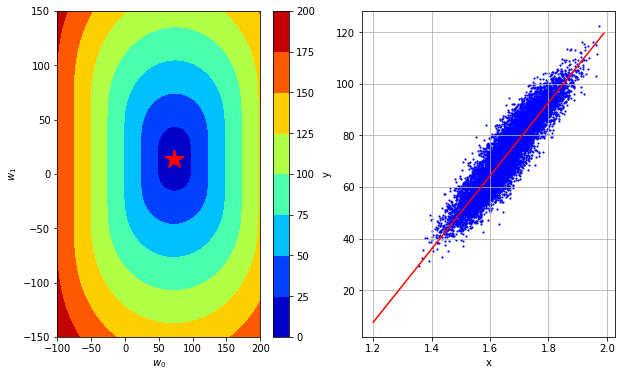

In [200]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [201]:
#def compute_gradient(y, tx, w): #Using MSE
    #error_vector = y - np.matmul(tx, w) 
    #return - np.matmul(tx.T, error_vector) / y.size 
    
def compute_subgradient(error): 
        if error < 0: 
            return -1.0
        elif error == 0: 
            return float(np.random.uniform(-1, 1))
        else:
            return 1.0
        
compute_subgradient = np.vectorize(compute_subgradient)

def compute_gradient(y, tx, w): #Using MAE (needs larger step size)
    error_vector = y - np.matmul(tx, w) 
    error_vector_processed = compute_subgradient(error_vector)
    return - np.matmul(tx.T, error_vector_processed) / y.size

Please fill in the functions `gradient_descent` below:

In [203]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [204]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 2.0

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210518, w0=2.0, w1=-5.2750692702829834e-15
Gradient Descent(1/49): loss=71.29392200210518, w0=4.0, w1=-1.0550138540565967e-14
Gradient Descent(2/49): loss=69.29392200210518, w0=6.0, w1=-1.582520781084895e-14
Gradient Descent(3/49): loss=67.29392200210518, w0=8.0, w1=-2.1100277081131934e-14
Gradient Descent(4/49): loss=65.29392200210518, w0=10.0, w1=-2.6375346351414917e-14
Gradient Descent(5/49): loss=63.29392200210517, w0=12.0, w1=-3.16504156216979e-14
Gradient Descent(6/49): loss=61.29392200210517, w0=14.0, w1=-3.6925484891980884e-14
Gradient Descent(7/49): loss=59.29392200210517, w0=16.0, w1=-4.220055416226387e-14
Gradient Descent(8/49): loss=57.29392200210517, w0=18.0, w1=-4.747562343254685e-14
Gradient Descent(9/49): loss=55.29392200210517, w0=20.0, w1=-5.2750692702829834e-14
Gradient Descent(10/49): loss=53.293922002105184, w0=22.0, w1=-5.802576197311282e-14
Gradient Descent(11/49): loss=51.29392200210517, w0=24.0, w1=-6.33008312433958e-14
G

In [205]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [206]:
#def compute_stoch_gradient(y, tx, w): #Using MSE
    #error = y - np.matmul(tx, w) 
    #return - np.matmul(tx.T, error) / y.size 

def compute_stoch_subgradient(error): 
        if error < 0: 
            return -1.0
        elif error == 0: 
            return float(np.random.uniform(-1, 1))
        else:
            return 1.0
        
compute_stoch_subgradient = np.vectorize(compute_stoch_subgradient)

def compute_stoch_gradient(y, tx, w): #Using MAE (needs larger step size)
    error_vector = y - np.matmul(tx, w) 
    error_vector_processed = compute_stoch_subgradient(error_vector)
    return - np.matmul(tx.T, error_vector_processed) / y.size

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        stochastic_gradient = np.array([0, 0])
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            stochastic_gradient = stochastic_gradient + compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        loss = compute_loss(y, tx, w)
        w =  w - gamma * stochastic_gradient
        ws.append(w)
        losses.append(loss)
    return losses, ws

In [209]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 2.0
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.046 seconds


In [211]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

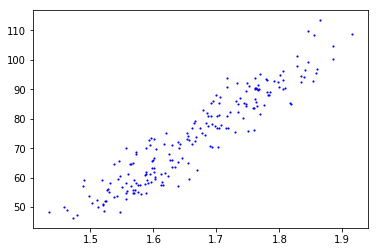

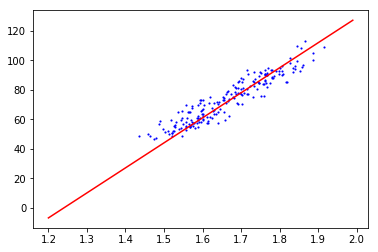

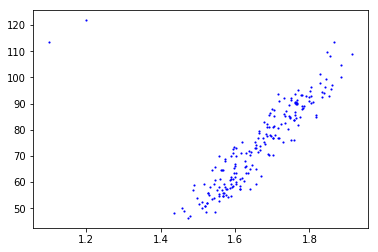

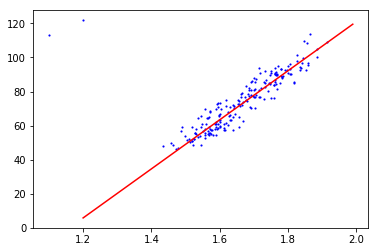

In [212]:
height, weight, gender = load_data(sub_sample = True, add_outlier = False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.figure(0)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
plt.show()

# Define the parameters of the algorithm.
max_iters = 50
gamma = 2.0
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)

from plots import prediction

plt.figure(1)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
pred_x, pred_y = prediction(sgd_ws[-1][0], sgd_ws[-1][1], mean_x, std_x)
plt.plot(pred_x, pred_y, 'r')

#with outliers:
height, weight, gender = load_data(sub_sample = True, add_outlier = True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.figure(2)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
plt.show()

sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)

plt.figure(3)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
pred_x, pred_y = prediction(sgd_ws[-1][0], sgd_ws[-1][1], mean_x, std_x)
plt.plot(pred_x, pred_y, 'r')


### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)